# Homework 4 - Genetic Networks #

## Negative Feedback Loop - Stress Response ##

Consider Stress molecules (S) that are controlled by Enzymes (E) which are controlled by Repressors (R). The concentrations of these components are regulated by the following equations:

$$ \frac{dR}{dt} = \frac{\gamma}{1+(\frac{R}{k})^h} - \frac{R}{\tau_R} + l $$
$$ \frac{dS}{dt} = \Theta_t - \gamma E S $$
$$ \frac{dE}{dt} = \frac{1}{1+(\frac{R}{k})^h} - \frac{E}{\tau_E} $$

Initial conditions: $ S(0) = E(0) = 0, R(0) = 0 $.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

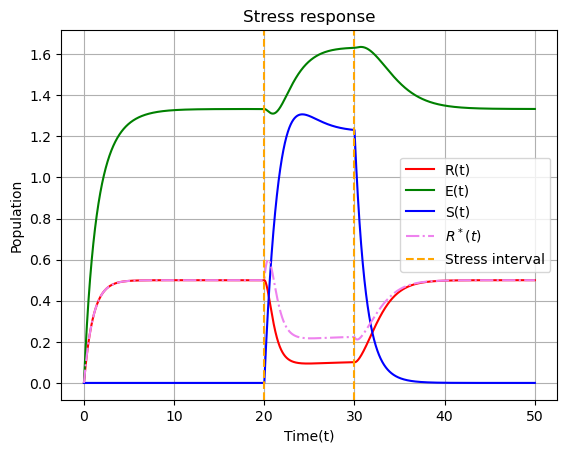

In [ ]:
# initial conditions
R0 = 0
S0 = 0
E0 = 0

par = [0.5,1,1,0,1,2,[20,30]]

# we define Theta_t(t), which is the stress source, to be a step function that activates and spikes at a certain 
# point in time. This makes sense since the stress is usually caused by an abrupt change or signal

def Theta_t(t):
    #return np.where(np.isclose(t,t_th,rtol=1e-4), 1, 0)
    return np.where(t>0,1,0)

# define the equations
def system(y, t, Theta_t, par):
    # par[0] = gamma
    # par[1] = k
    # par[2] = h
    # par[3] = l
    # par[4] = tau_R
    # par[5] = tau_E
    # par [6] = t_th (t_s: stress point)
    
    R, E, S = y
    R_star = R * (1+S)
    drdt = par[0] / (1 + (S/par[1])**par[2]) - (R_star/par[4]) + par[3]
    dedt = 1 / (1+(R_star/par[1])**par[2]) - (E / par[5])
    dsdt = Theta_t(t-par[6][0])*(1-Theta_t(t-par[6][1])) - par[0] * E * S   
    return [drdt,dedt,dsdt]

# set the time space
t_s = np.linspace(0,50,5000)


# Solve 
R= odeint(system, [R0,E0,S0], t_s, args=(Theta_t,par))[:,0]
E = odeint(system, [R0,E0,S0], t_s, args=(Theta_t,par))[:,1]
S = odeint(system, [R0,E0,S0], t_s, args=(Theta_t,par))[:,2]
plt.plot(t_s, R, c='r', label='R(t)')
plt.plot(t_s, E, c='g', label='E(t)')
plt.plot(t_s, S,  c='b', label='S(t)')
plt.plot(t_s, R*(1+S), c='violet', linestyle='-.', label='$R^*(t)$')
plt.axvline(par[6][0], c='orange', linestyle='--', label='Stress interval')
plt.axvline(par[6][1], c='orange', linestyle='--')
plt.legend()
plt.grid()
plt.xlabel('Time(t)')
plt.ylabel('Population')
plt.title('Stress response')
plt.savefig('Figures/nfl.png')
# metti checkpoint per file salvato correttamente
plt.show()


## Genetic Network - Combining Positive and Negative Feedback Loops ##

Here R is external to the loop, so we take it as constant (R=1).

The equations that regulates this process are the folowing:

$$
\frac{dS}{dt} = \sigma \frac{T}{T+1} - \gamma S \frac{E}{E+1}
$$
$$
\frac{dT}{dt} = - \tau_T T + \frac{1}{1+(\frac{R_s}{k})^h} + l_T 
$$
$$
\frac{dE}{dt} = -\tau_E E + \frac{1}{1+(\frac{R_s}{k})^h} + l_E 
$$

where $R_s = \frac{RS}{1+S} $.

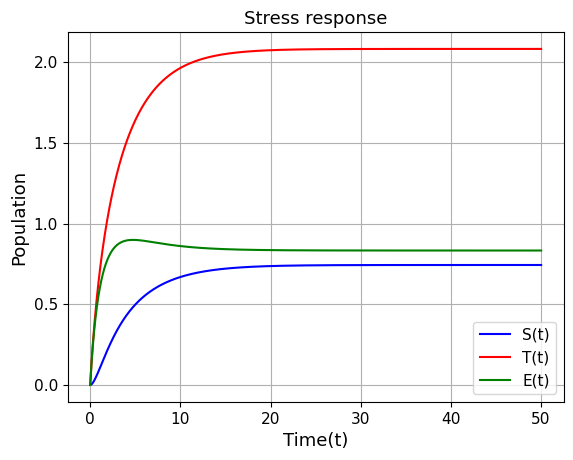

In [6]:
FONTSIZE = 13

# initial conditions
S0 = 0
T0 = 0
E0 = 0

par = [0.8, # gamma
       0.2,   # k
       0.5,   # h
       0.4, # sigma
       1,   # R_const
       0.2,   # tau_T
       0.5,   # tau_E
       0.01,   # l_T
       0.01]   # l_E

# altro set di parametri
p = [0.5, .5, 1.0, 0.7, 1, 2.0, 1.0, 0.0, 0.0]

def network(y, t, par):
    gamma, k, h, sigma, R, tau_T, tau_E, l_T, l_E = par
    
    S, T, E = y
    R_monod = R*S / (1 + S)
    dsdt = sigma*(T/(T+1)) - gamma*S*(E/(E+1))
    dtdt = - tau_T * T + 1 / (1 + (R_monod/k)**h) + l_T
    dedt = -tau_E * E + 1/(1+(R_monod/k)**h) + l_E
    return [dsdt, dtdt, dedt]

# set the time space
t_s = np.linspace(0,50,5000)

# Solve 
result = odeint(network, [E0,T0,S0], t_s, args=(par,))
S = result[:,0]
T = result[:,1]
E = result[:,2]

plt.plot(t_s, S,  c='b', label='S(t)')
plt.plot(t_s, T, c='r', label='T(t)')
plt.plot(t_s, E,  c='g', label='E(t)')
plt.legend(fontsize=FONTSIZE-2)
plt.grid()
plt.xlabel('Time(t)', fontsize=FONTSIZE)
plt.ylabel('Population', fontsize=FONTSIZE)
plt.title('Stress response', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)
plt.savefig('Figures/network.png')
plt.show()

Now we try to add a stress impulse, as we did for the NFL:

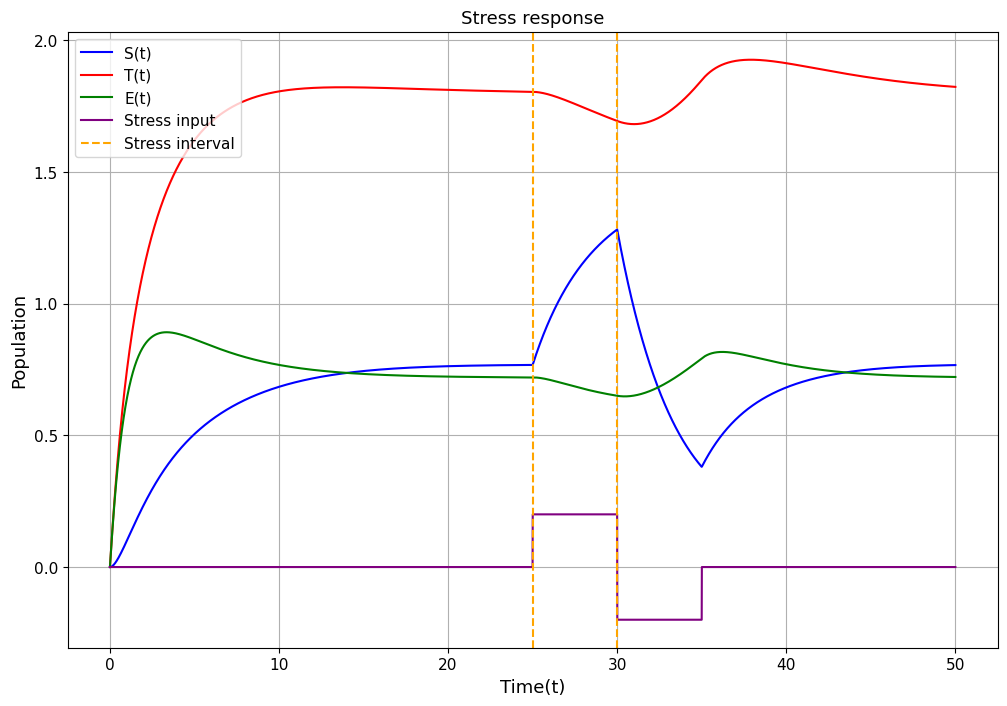

In [7]:
def Theta_t(t):
    return np.where(t>0,1,0)

# initial conditions
S0 = 0
T0 = 0
E0 = 0

par = [0.8, # gamma
       0.2,   # k
       0.8,   # h
       0.4, # sigma
       1,   # R_const
       0.2,   # tau_T
       0.5,   # tau_E
       0.01,   # l_T
       0.01,    # l_E
       [25,30]]   # t_th

# altro set di parametri
p = [0.5, .5, 1.0, 0.7, 1, 2.0, 1.0, 0.0, 0.0]

def network(y, t, Theta_t, par):
    gamma, k, h, sigma, R, tau_T, tau_E, l_T, l_E, t_th= par
    
    S, T, E = y
    R_monod = R*S / (1 + S)
    dsdt = 0.2*Theta_t(t-t_th[0])*(1-Theta_t(t-t_th[1]))+0.2*(-Theta_t(t-t_th[0]-5)*(1-Theta_t(t-t_th[1]-5))) + sigma*(T/(T+1)) - gamma*S*(E/(E+1))
    dtdt = - tau_T * T + 1 / (1 + (R_monod/k)**h) + l_T
    dedt = -tau_E * E + 1/(1+(R_monod/k)**h) + l_E
    return [dsdt, dtdt, dedt]

# set the time space
t_s = np.linspace(0,50,5000)

# Solve 
result = odeint(network, [E0,T0,S0], t_s, args=(Theta_t, par))
S = result[:,0]
T = result[:,1]
E = result[:,2]

plt.figure(figsize=(12,8))
plt.plot(t_s, S,  c='b', label='S(t)')
plt.plot(t_s, T, c='r', label='T(t)')
plt.plot(t_s, E,  c='g', label='E(t)')
plt.plot(t_s, 0.2*Theta_t(t_s-par[9][0])*(1-Theta_t(t_s-par[9][1]))
         +0.2*(-Theta_t(t_s-par[9][0]-5)*(1-Theta_t(t_s-par[9][1]-5))),
         c='purple', label='Stress input')
plt.axvline(par[9][0], c='orange', linestyle='--', label='Stress interval')
plt.axvline(par[9][1], c='orange', linestyle='--')
plt.legend(fontsize=FONTSIZE-2)
plt.grid()
plt.xlabel('Time(t)', fontsize=FONTSIZE)
plt.ylabel('Population', fontsize=FONTSIZE)
plt.title('Stress response', fontsize=FONTSIZE)
plt.tick_params(labelsize=FONTSIZE-2)
plt.savefig('Figures/network_stress.png')
plt.show()